In [1]:
import pandas as pd
import numpy as np

# Specify the file path
file_path = './smoker_dataset/smoker_dataset.csv'

# Read the CSV file
df = pd.read_csv(file_path)

# Display the DataFrame
print(df)


       Age  Gender               Profession     District Smoking_Status  \
0       62    Male      Agricultural Worker    Joypurhat   Heavy Smoker   
1       65    Male  Healthcare Professional    Sirajganj  Medium Smoker   
2       18    Male                  Student         Feni  Medium Smoker   
3       21    Male                  Student    Sirajganj   Never Smoked   
4       21    Male     Artisan/Craftsperson     Kurigram   Never Smoked   
...    ...     ...                      ...          ...            ...   
99995   48  Female                Housewife    Nawabganj   Never Smoked   
99996   50  Female      Agricultural Worker      Jessore   Never Smoked   
99997   32  Female                  Student     Pirojpur   Never Smoked   
99998   55    Male                  Teacher     Satkhira   Light Smoker   
99999   42    Male                  Student  Cox's Bazar   Never Smoked   

       Age_at_Initiation Exposure_to_Secondhand_Smoke  \
0                   55.0                  

# BD - District Wise Smokers Choropleth


In [2]:
from json import load
bd_districts=load(open('bangladesh_geojson_adm2_64_districts_zillas.json','r'))
# bd_districts

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'MultiPolygon',
    'coordinates': [[[[89.84021305100003, 21.827843220000034],
       [89.84052032800008, 21.827795520000052],
       [89.84092975800007, 21.82779591600007],
       [89.84118572300008, 21.82793958900004],
       [89.84139017500007, 21.828178926000078],
       [89.84179980400006, 21.82827503200008],
       [89.84215813400004, 21.828275376000022],
       [89.84287556500004, 21.82784577700005],
       [89.84410529400003, 21.82708180800006],
       [89.84518268500005, 21.825122832000034],
       [89.84595242300009, 21.823545847000048],
       [89.84672148000004, 21.822590284000057],
       [89.84733626200006, 21.82225628300006],
       [89.84856556700004, 21.821827133000056],
       [89.84948755300007, 21.82149312100006],
       [89.85207536200005, 21.819344045000037],
       [89.85289571000004, 21.81843649500007],
       [89.85325494300008, 21.817528250000066],
       [89.85346110200004

In [3]:
bd_districts['features'][61].keys()

dict_keys(['type', 'geometry', 'properties', 'id'])

In [4]:
bd_districts["features"][61]['properties']

{'Shape_Leng': 4.33816671063,
 'Shape_Area': 0.305453340389,
 'ADM2_EN': 'Sylhet',
 'ADM2_PCODE': 'BD6091',
 'ADM2_REF': None,
 'ADM2ALT1EN': None,
 'ADM2ALT2EN': None,
 'ADM1_EN': 'Sylhet',
 'ADM1_PCODE': 'BD60',
 'ADM0_EN': 'Bangladesh',
 'ADM0_PCODE': 'BD',
 'date': '2015/01/01',
 'validOn': '2020/11/13',
 'ValidTo': None}

In [5]:
df

Age  Gender               Profession     District Smoking_Status  \
0       62    Male      Agricultural Worker    Joypurhat   Heavy Smoker   
1       65    Male  Healthcare Professional    Sirajganj  Medium Smoker   
2       18    Male                  Student         Feni  Medium Smoker   
3       21    Male                  Student    Sirajganj   Never Smoked   
4       21    Male     Artisan/Craftsperson     Kurigram   Never Smoked   
...    ...     ...                      ...          ...            ...   
99995   48  Female                Housewife    Nawabganj   Never Smoked   
99996   50  Female      Agricultural Worker      Jessore   Never Smoked   
99997   32  Female                  Student     Pirojpur   Never Smoked   
99998   55    Male                  Teacher     Satkhira   Light Smoker   
99999   42    Male                  Student  Cox's Bazar   Never Smoked   

       Age_at_Initiation Exposure_to_Secondhand_Smoke  \
0                   55.0                          Yes   
1                   25.0                          Yes   
2                   10.0                          Yes   
3                    NaN                           No   
4                    NaN                          Yes   
...                  ...                          ...   
99995                NaN                           No   
99996                NaN                          Yes   
99997                NaN                           No   
99998               37.0                          Yes   
99999                NaN                           No   

      Awareness_of_Smoking_Risks Pocket_Money Cough Shortness of Breath  \
0                   No Awareness       Medium   Yes                 Yes   
1                           High         High   Yes                 Yes   
2                   No Awareness          Low   Yes                 Yes   
3                       Moderate          Low    No                  No   
4                           High       Medium    No                  No   
...                          ...          ...   ...                 ...   
99995                        Low          Low    No                  No   
99996                        Low       Medium    No                  No   
99997                        Low          Low    No                  No   
99998                       High       Medium   Yes                  No   
99999                       High          Low    No                  No   

      Chest Pain Fatigue Persistent Cough Wheezing  District_ID  
0            Yes     Yes              Yes      Yes           24  
1             No     Yes               No      Yes           59  
2            Yes      No              Yes      Yes           15  
3             No     Yes               No       No           59  
4             No      No               No       No           28  
...          ...     ...              ...      ...          ...  
99995         No      No               No       No           44  
99996         No      No               No      Yes           21  
99997         No      No               No       No           51  
99998         No     Yes               No       No           56  
99999         No      No               No       No           11  

[100000 rows x 16 columns]

In [6]:
df.District

0          Joypurhat
1          Sirajganj
2               Feni
3          Sirajganj
4           Kurigram
            ...     
99995      Nawabganj
99996        Jessore
99997       Pirojpur
99998       Satkhira
99999    Cox's Bazar
Name: District, Length: 100000, dtype: object

In [7]:
## MAp district by id

district_id_map = {}
for feature in bd_districts["features"]:
    feature["id"] = feature["id"]
    district_id_map[feature["properties"]["ADM2_EN"]] = feature["id"]

In [8]:
district_id_map 

{'Bagerhat': 0,
 'Bandarban': 1,
 'Barguna': 2,
 'Barisal': 3,
 'Bhola': 4,
 'Bogra': 5,
 'Brahamanbaria': 6,
 'Chandpur': 7,
 'Chittagong': 8,
 'Chuadanga': 9,
 'Comilla': 10,
 "Cox's Bazar": 11,
 'Dhaka': 12,
 'Dinajpur': 13,
 'Faridpur': 14,
 'Feni': 15,
 'Gaibandha': 16,
 'Gazipur': 17,
 'Gopalganj': 18,
 'Habiganj': 19,
 'Jamalpur': 20,
 'Jessore': 21,
 'Jhalokati': 22,
 'Jhenaidah': 23,
 'Joypurhat': 24,
 'Khagrachhari': 25,
 'Khulna': 26,
 'Kishoreganj': 27,
 'Kurigram': 28,
 'Kushtia': 29,
 'Lakshmipur': 30,
 'Lalmonirhat': 31,
 'Madaripur': 32,
 'Magura': 33,
 'Manikganj': 34,
 'Maulvibazar': 35,
 'Meherpur': 36,
 'Munshiganj': 37,
 'Mymensingh': 38,
 'Naogaon': 39,
 'Narail': 40,
 'Narayanganj': 41,
 'Narsingdi': 42,
 'Natore': 43,
 'Nawabganj': 44,
 'Netrakona': 45,
 'Nilphamari': 46,
 'Noakhali': 47,
 'Pabna': 48,
 'Panchagarh': 49,
 'Patuakhali': 50,
 'Pirojpur': 51,
 'Rajbari': 52,
 'Rajshahi': 53,
 'Rangamati': 54,
 'Rangpur': 55,
 'Satkhira': 56,
 'Shariatpur': 57,
 'Sh

In [9]:
df['Smokers_Count'] = df['Smoking_Status'].apply(lambda x: 1 if x != 'Never Smoked' else 0)

# Group by 'District' and sum the 'Smokers_Count'
district_smokers = df.groupby('District')['Smokers_Count'].sum().reset_index(name='DistrictWiseSmokers')

district_smokers

District  DistrictWiseSmokers
0     Bagerhat                  764
1    Bandarban                  733
2      Barguna                  765
3      Barisal                  841
4        Bhola                  774
..         ...                  ...
59   Sirajganj                  798
60   Sunamganj                  788
61      Sylhet                  822
62     Tangail                  781
63  Thakurgaon                  793

[64 rows x 2 columns]

In [10]:
## Merge both dataframe according to "id"
district_smokers['id'] = district_smokers.District.apply(lambda x: district_id_map[x])
district_smokers

District  DistrictWiseSmokers  id
0     Bagerhat                  764   0
1    Bandarban                  733   1
2      Barguna                  765   2
3      Barisal                  841   3
4        Bhola                  774   4
..         ...                  ...  ..
59   Sirajganj                  798  59
60   Sunamganj                  788  60
61      Sylhet                  822  61
62     Tangail                  781  62
63  Thakurgaon                  793  63

[64 rows x 3 columns]

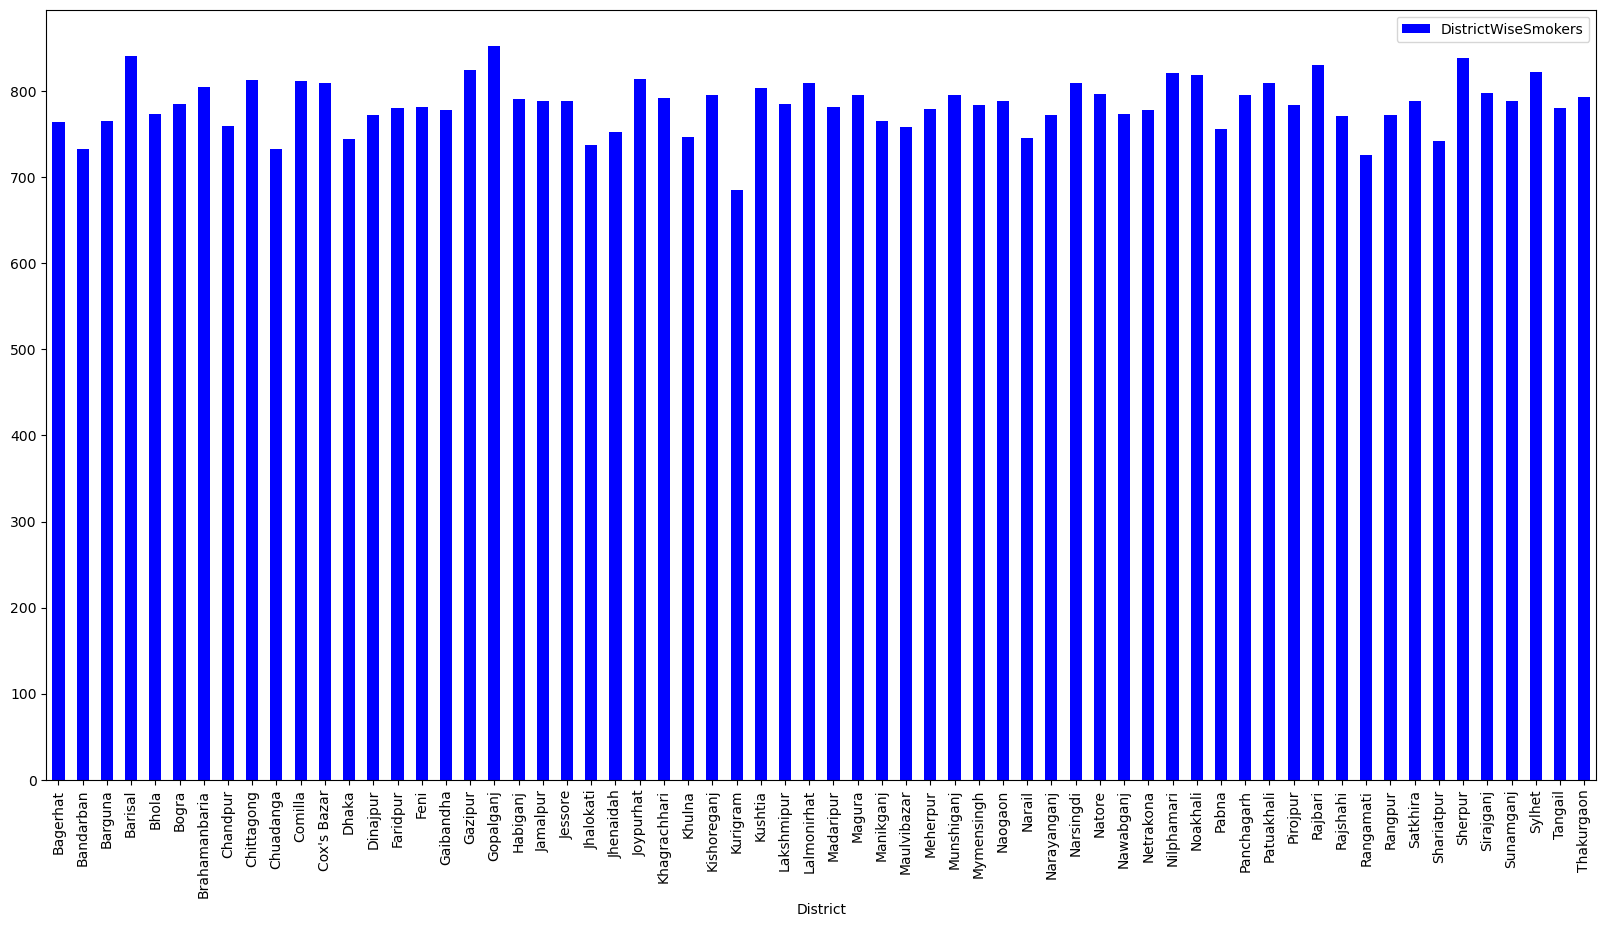

In [11]:
import matplotlib.pyplot as plt


# Plotting the bar chart
district_smokers.plot.bar(
    x='District', 
    y='DistrictWiseSmokers',
    xlabel='District',
    rot=90,
    figsize=(20, 10),
    fontsize=10,
    color='blue'
)

plt.show()


In [12]:
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'browser'

In [2]:
fig = px.choropleth(
    district_smokers,
    locations='id',
    geojson=bd_districts,
    color='DistrictWiseSmokers',
    title='Bangladesh Smokers Survey',
)
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

In [14]:
district_smokers['Smoker scale'] = np.log10(district_smokers['DistrictWiseSmokers'])
district_smokers

District  DistrictWiseSmokers  id  Smoker scale
0     Bagerhat                  764   0      2.883093
1    Bandarban                  733   1      2.865104
2      Barguna                  765   2      2.883661
3      Barisal                  841   3      2.924796
4        Bhola                  774   4      2.888741
..         ...                  ...  ..           ...
59   Sirajganj                  798  59      2.902003
60   Sunamganj                  788  60      2.896526
61      Sylhet                  822  61      2.914872
62     Tangail                  781  62      2.892651
63  Thakurgaon                  793  63      2.899273

[64 rows x 4 columns]

In [3]:
fig = px.choropleth(
    district_smokers,
    locations='id',
    geojson=bd_districts,
    color='Smoker scale',
    hover_name='District',
    hover_data=['DistrictWiseSmokers'],
    title='Bangladesh Smokers'
)
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

In [4]:
px.choropleth_mapbox(district_smokers,
    locations='id',
    geojson=bd_districts,
    color='Smoker scale',
    hover_name='District',
    hover_data=['DistrictWiseSmokers'],
    title='Bangladesh Smokers',
    mapbox_style='carto-positron',
    center= { 'lat' : 23.6850, 'lon' : 90.3563},
    zoom=4.8,
    opacity=0.6)

# Exploratory Data Analysis (EDA)

Initial Data Overview

In [17]:
# View the first few rows of the DataFrame
print(df.head())

# Check the size of the dataset
print(df.shape)

# Identify the data types of each column
print(df.dtypes)


   Age Gender               Profession   District Smoking_Status  \
0   62   Male      Agricultural Worker  Joypurhat   Heavy Smoker   
1   65   Male  Healthcare Professional  Sirajganj  Medium Smoker   
2   18   Male                  Student       Feni  Medium Smoker   
3   21   Male                  Student  Sirajganj   Never Smoked   
4   21   Male     Artisan/Craftsperson   Kurigram   Never Smoked   

   Age_at_Initiation Exposure_to_Secondhand_Smoke Awareness_of_Smoking_Risks  \
0               55.0                          Yes               No Awareness   
1               25.0                          Yes                       High   
2               10.0                          Yes               No Awareness   
3                NaN                           No                   Moderate   
4                NaN                          Yes                       High   

  Pocket_Money Cough Shortness of Breath Chest Pain Fatigue Persistent Cough  \
0       Medium   Yes          

Statistical Summary

In [18]:
# For numerical features
print(df.describe())

# For categorical features
print(df.describe(include='object'))


                 Age  Age_at_Initiation   District_ID  Smokers_Count
count  100000.000000       50174.000000  100000.00000  100000.000000
mean       44.138930          26.632359      31.53444       0.501740
std        15.319343          13.215221      18.46802       0.499999
min        18.000000          10.000000       0.00000       0.000000
25%        31.000000          16.000000      16.00000       0.000000
50%        44.000000          23.000000      32.00000       1.000000
75%        57.000000          35.000000      48.00000       1.000000
max        70.000000          69.000000      63.00000       1.000000
        Gender Profession District Smoking_Status  \
count   100000     100000   100000         100000   
unique       2         13       64              5   
top       Male    Student  Naogaon   Never Smoked   
freq     59928      14733     1626          49826   

       Exposure_to_Secondhand_Smoke Awareness_of_Smoking_Risks Pocket_Money  \
count                        10000

Missing Value Analysis

In [19]:
# Check for missing values in each column
print(df.isnull().sum())


Age                                 0
Gender                              0
Profession                          0
District                            0
Smoking_Status                      0
Age_at_Initiation               49826
Exposure_to_Secondhand_Smoke        0
Awareness_of_Smoking_Risks          0
Pocket_Money                        0
Cough                               0
Shortness of Breath                 0
Chest Pain                          0
Fatigue                             0
Persistent Cough                    0
Wheezing                            0
District_ID                         0
Smokers_Count                       0
dtype: int64


Distribution of Numerical Features

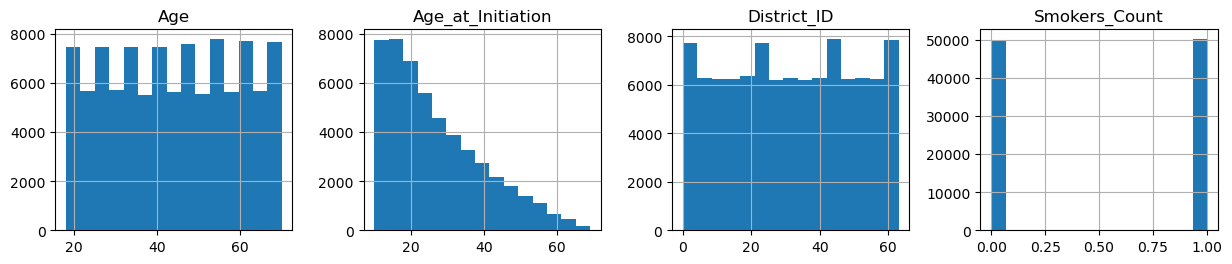

In [20]:
import matplotlib.pyplot as plt

# Histograms for numerical features
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
df[numerical_cols].hist(bins=15, figsize=(15, 6), layout=(2, 4))
plt.show()


Categorical Data Analysis

In [21]:
# Frequency of each category in categorical columns
for col in df.select_dtypes(include='object').columns:
    print(df[col].value_counts())
    print("\n")


Gender
Male      59928
Female    40072
Name: count, dtype: int64


Profession
Student                       14733
Agricultural Worker            9587
Teacher                        8478
Construction Worker            7505
Healthcare Professional        7430
Housewife                      7359
Textile Worker                 7335
Shopkeeper/Trader              7327
Driver                         7213
Others                         6255
Freelancer/IT Professional     6222
Unemployed/Dependent           5316
Artisan/Craftsperson           5240
Name: count, dtype: int64


District
Naogaon        1626
Sherpur        1624
Gopalganj      1616
Comilla        1611
Rajbari        1611
               ... 
Maulvibazar    1512
Dhaka          1505
Shariatpur     1492
Jhalokati      1489
Kurigram       1461
Name: count, Length: 64, dtype: int64


Smoking_Status
Never Smoked     49826
Heavy Smoker     12647
Medium Smoker    12619
Light Smoker     12463
Former Smoker    12445
Name: count, dtype: int64



Correlation Analysis

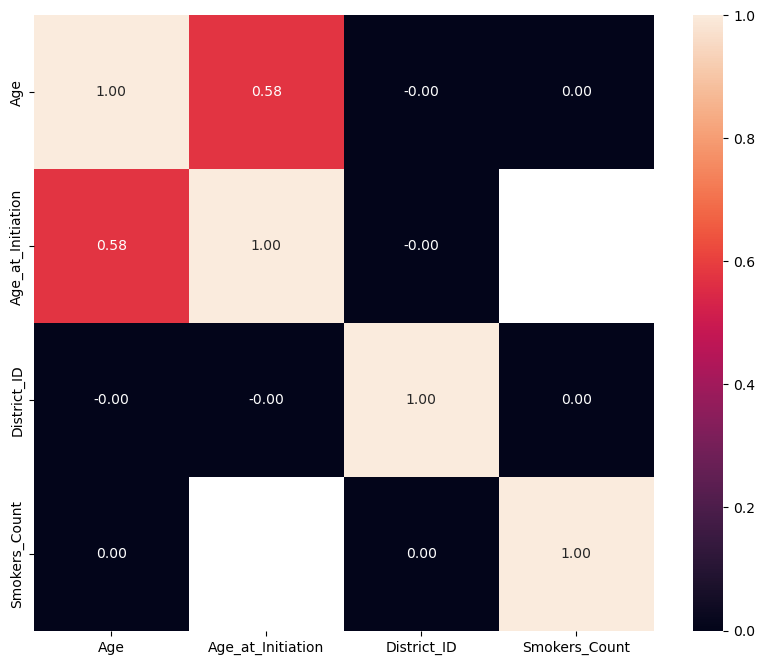

In [22]:
import seaborn as sns

# Convert Data to Numeric Values
numeric_df = df.select_dtypes(include=[np.number])


plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f")
plt.show()

Pairwise Relationships

C:\Users\Nayeem Islam\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



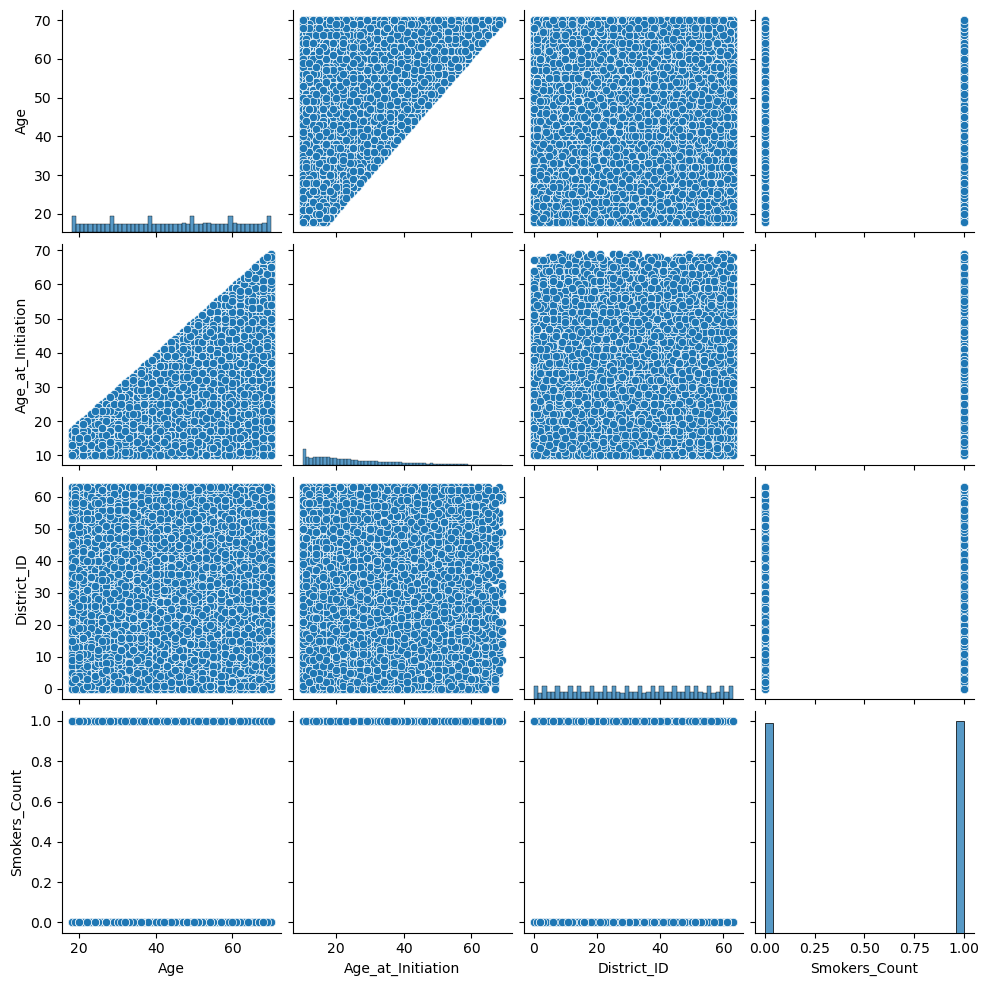

In [23]:
# Pairplot for numerical features
sns.pairplot(df.select_dtypes(include=np.number))
plt.show()


Outlier Detection

In [24]:
# Select only numeric columns for calculating IQR
numeric_df = df.select_dtypes(include=[np.number])

# Calculate Q1, Q3, and IQR for numeric columns
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1


In [25]:
# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Identify Outliers
outliers = (numeric_df < lower_bound) | (numeric_df > upper_bound)
outliers

Age  Age_at_Initiation  District_ID  Smokers_Count
0      False              False        False          False
1      False              False        False          False
2      False              False        False          False
3      False              False        False          False
4      False              False        False          False
...      ...                ...          ...            ...
99995  False              False        False          False
99996  False              False        False          False
99997  False              False        False          False
99998  False              False        False          False
99999  False              False        False          False

[100000 rows x 4 columns]

In [26]:
outlier_counts = outliers.sum()
print(outlier_counts)

#remove outliers
df_no_outliers = numeric_df[~((numeric_df < lower_bound) | (numeric_df > upper_bound)).any(axis=1)]
df_no_outliers

Age                    0
Age_at_Initiation    363
District_ID            0
Smokers_Count          0
dtype: int64


Age  Age_at_Initiation  District_ID  Smokers_Count
0       62               55.0           24              1
1       65               25.0           59              1
2       18               10.0           15              1
3       21                NaN           59              0
4       21                NaN           28              0
...    ...                ...          ...            ...
99995   48                NaN           44              0
99996   50                NaN           21              0
99997   32                NaN           51              0
99998   55               37.0           56              1
99999   42                NaN           11              0

[99637 rows x 4 columns]

Additional Visualizations (Optional)

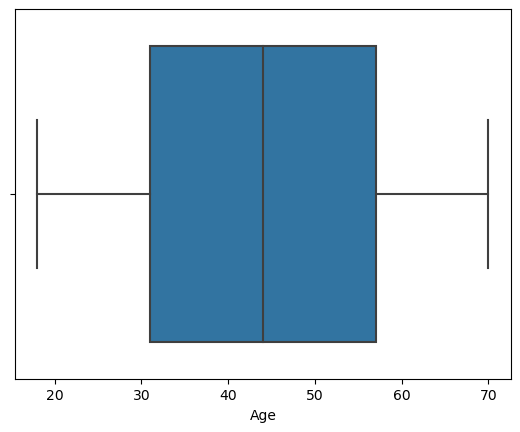

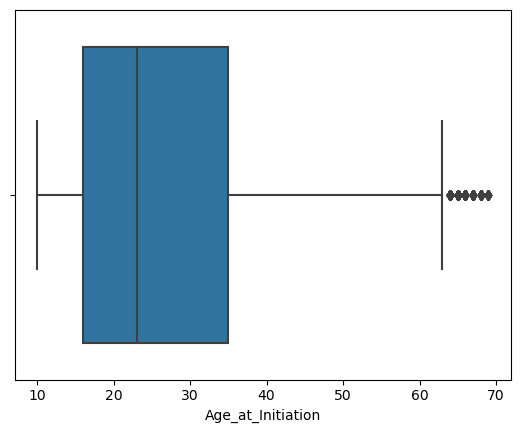

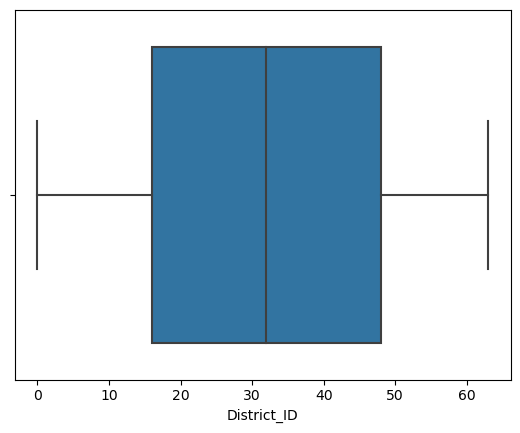

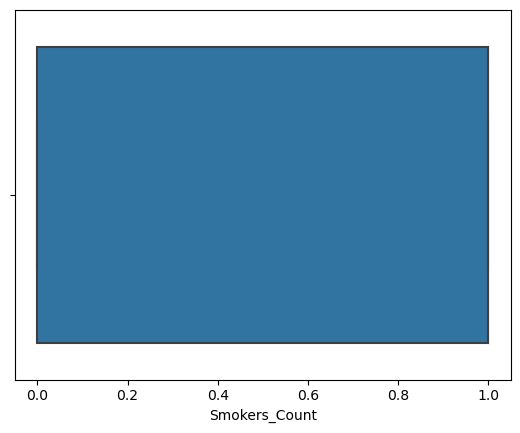

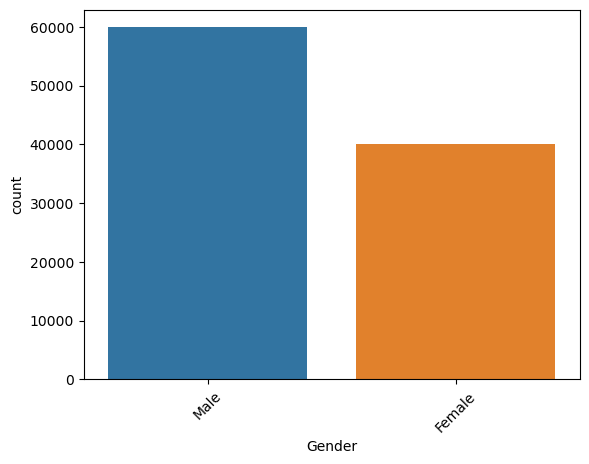

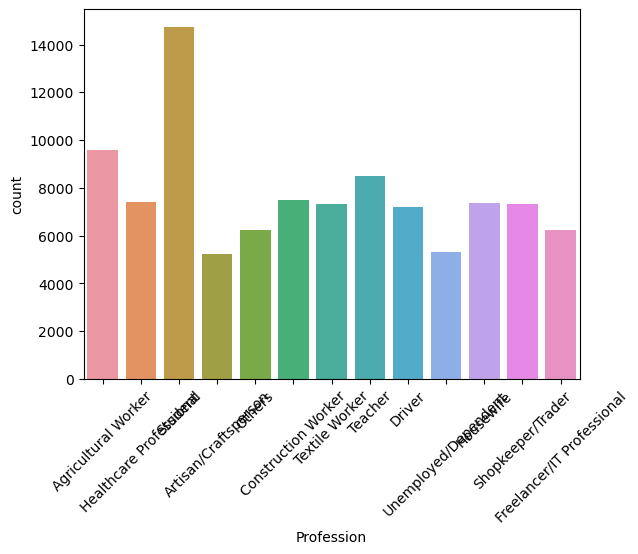

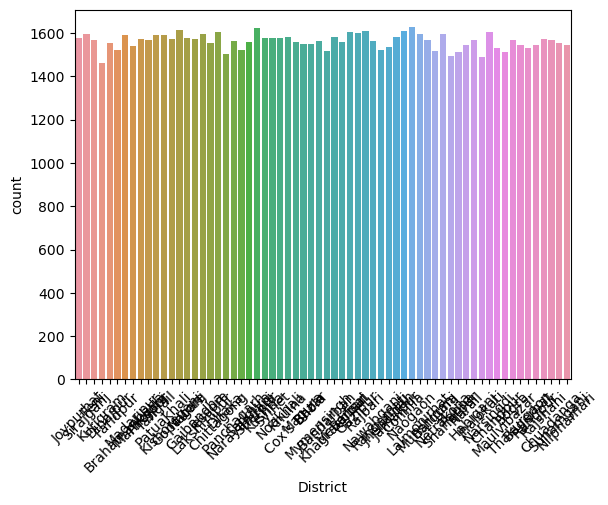

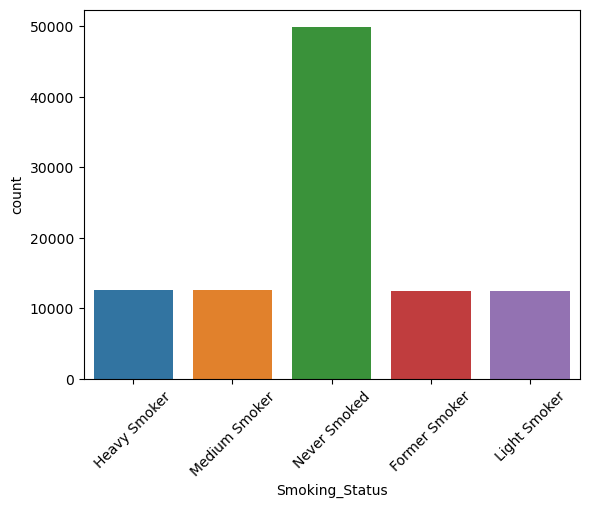

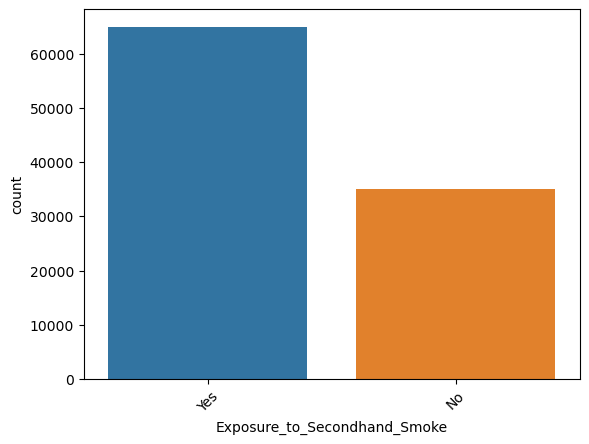

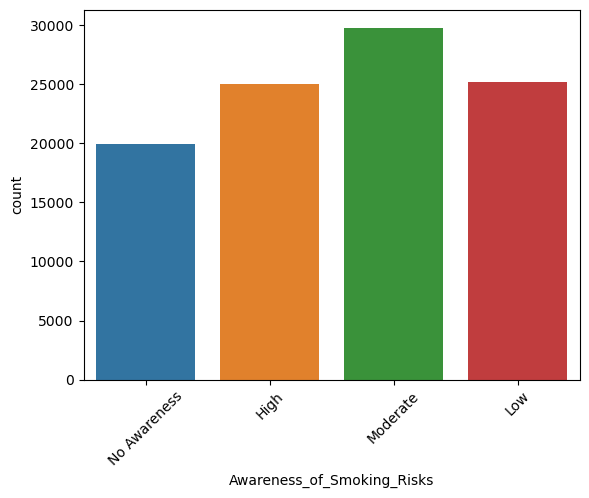

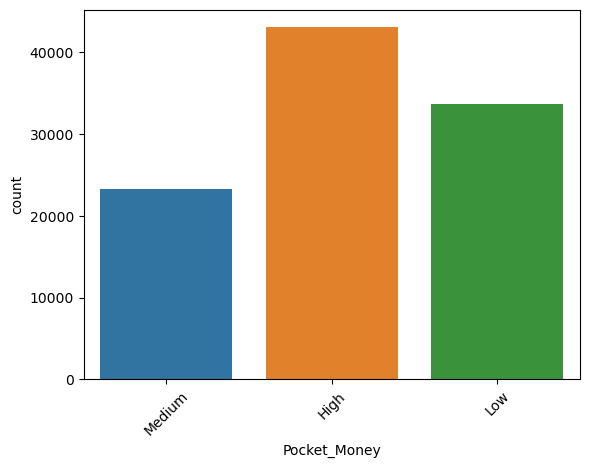

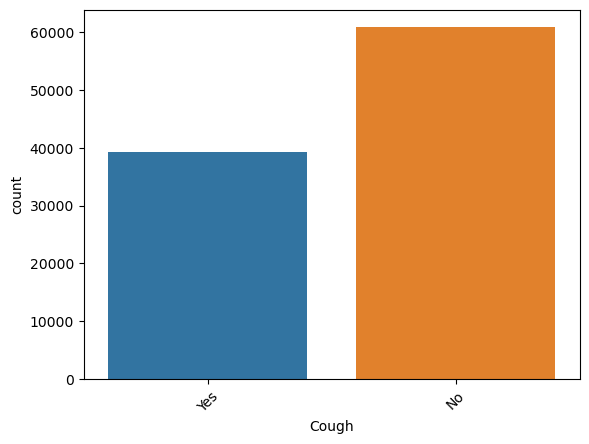

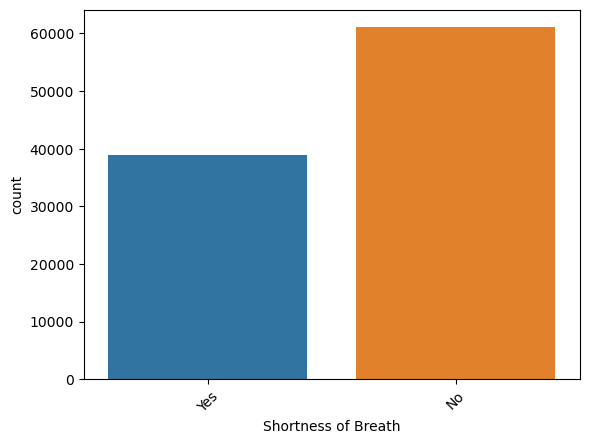

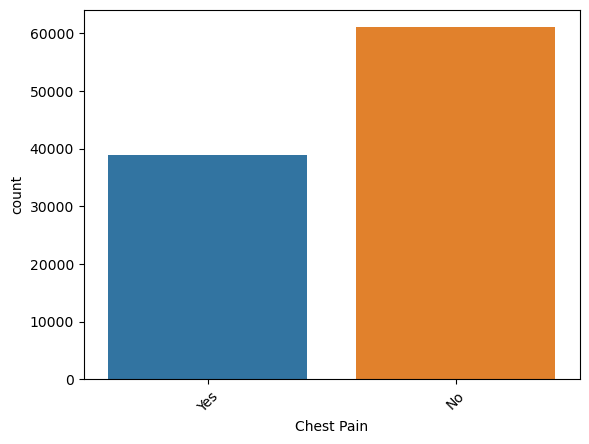

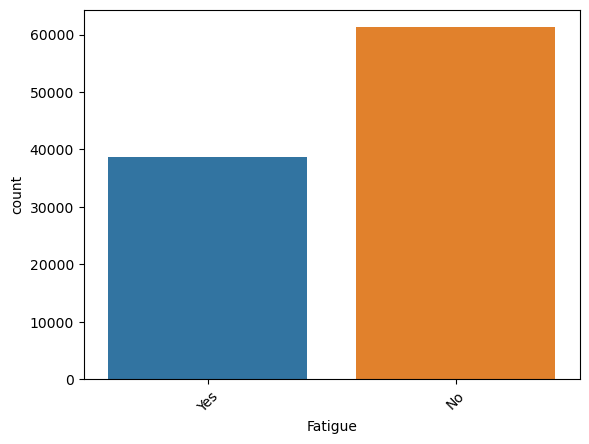

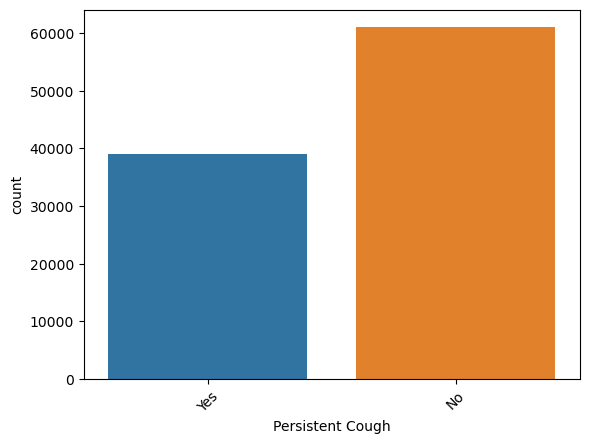

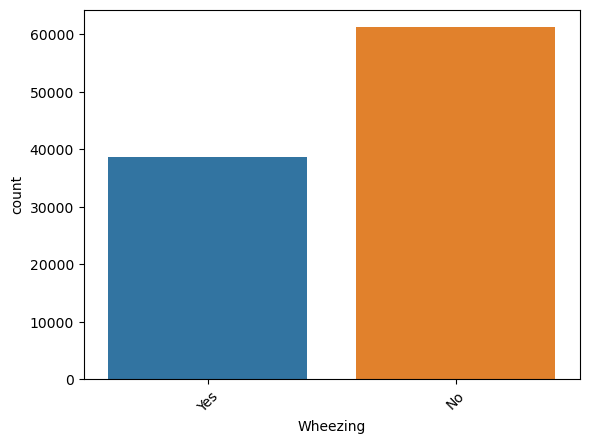

In [27]:
# Box plots for numerical variables
for col in numerical_cols:
    sns.boxplot(data=df, x=col)
    plt.show()

# Bar charts for categorical variables
for col in df.select_dtypes(include='object').columns:
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=45)
    plt.show()


Data Quality Checks

In [28]:
# Check for duplicate rows
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 647


# Predictive Analysis on Health Issues Based on Smoking Habits

Research Task: Predict the likelihood of specific health symptoms (like cough, chest pain) based on smoking status and other factors.

In [29]:
# df = primaryDF
df.head()

Age Gender               Profession   District Smoking_Status  \
0   62   Male      Agricultural Worker  Joypurhat   Heavy Smoker   
1   65   Male  Healthcare Professional  Sirajganj  Medium Smoker   
2   18   Male                  Student       Feni  Medium Smoker   
3   21   Male                  Student  Sirajganj   Never Smoked   
4   21   Male     Artisan/Craftsperson   Kurigram   Never Smoked   

   Age_at_Initiation Exposure_to_Secondhand_Smoke Awareness_of_Smoking_Risks  \
0               55.0                          Yes               No Awareness   
1               25.0                          Yes                       High   
2               10.0                          Yes               No Awareness   
3                NaN                           No                   Moderate   
4                NaN                          Yes                       High   

  Pocket_Money Cough Shortness of Breath Chest Pain Fatigue Persistent Cough  \
0       Medium   Yes                 Yes        Yes     Yes              Yes   
1         High   Yes                 Yes         No     Yes               No   
2          Low   Yes                 Yes        Yes      No              Yes   
3          Low    No                  No         No     Yes               No   
4       Medium    No                  No         No      No               No   

  Wheezing  District_ID  Smokers_Count  
0      Yes           24              1  
1      Yes           59              1  
2      Yes           15              1  
3       No           59              0  
4       No           28              0

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer


# Convert categorical variables to dummy variables
X = pd.get_dummies(df.drop(['Cough', 'District'], axis=1)) # Drop District as we have District_ID
y = df['Cough'].map({'Yes': 1, 'No': 0})  # Encoding Cough as binary

# Handling missing values
imputer = SimpleImputer(strategy='constant', fill_value=-1)
X = imputer.fit_transform(X)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predicting and evaluating
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.82      0.84      0.83     12155
           1       0.74      0.72      0.73      7845

    accuracy                           0.79     20000
   macro avg       0.78      0.78      0.78     20000
weighted avg       0.79      0.79      0.79     20000



# Comparison of Health Risks between Smokers and Non-Smokers

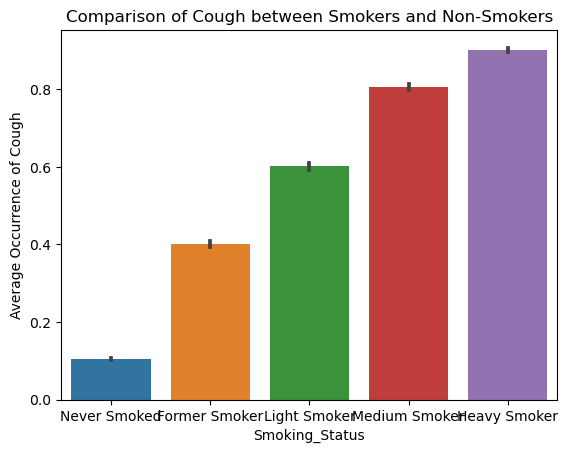

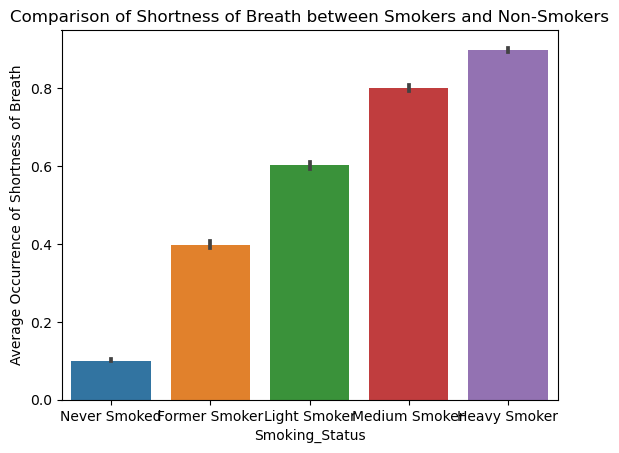

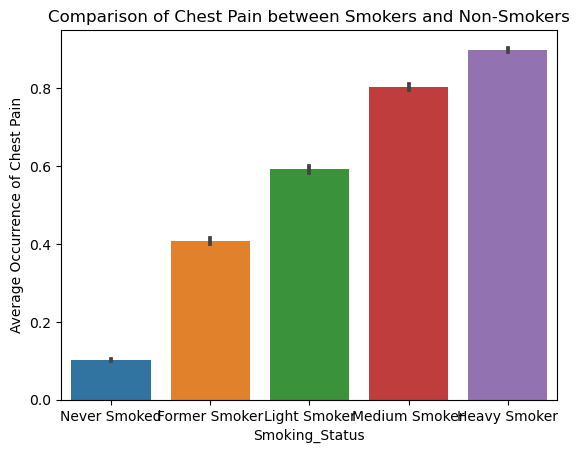

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Comparing health risks
for symptom in ['Cough', 'Shortness of Breath', 'Chest Pain']:
    # Mapping Yes/No to numeric for plotting
    df[symptom+'_num'] = df[symptom].map({'Yes': 1, 'No': 0})

    sns.barplot(x='Smoking_Status', y=symptom+'_num', data=df, order=["Never Smoked", "Former Smoker", "Light Smoker", "Medium Smoker", "Heavy Smoker"])
    plt.title(f'Comparison of {symptom} between Smokers and Non-Smokers')
    plt.ylabel('Average Occurrence of ' + symptom)
    plt.show()


# Clustering of Districts Based on Health Data

C:\Users\Nayeem Islam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Nayeem Islam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



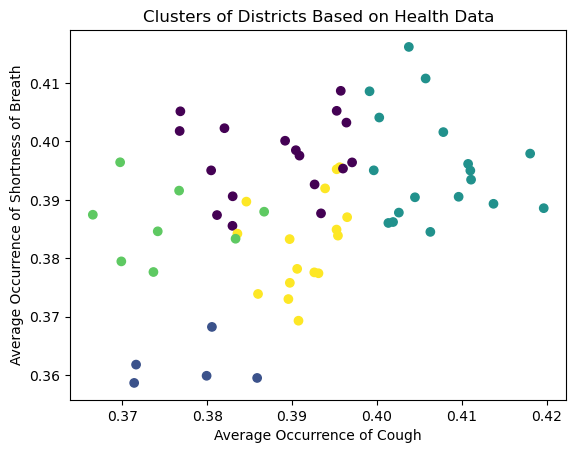

In [32]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Preparing data for clustering
# Mapping Yes/No to numeric for clustering
for symptom in ['Cough', 'Shortness of Breath', 'Chest Pain']:
    df[symptom+'_num'] = df[symptom].map({'Yes': 1, 'No': 0})

data_for_clustering = df.groupby('District_ID')[['Cough_num', 'Shortness of Breath_num', 'Chest Pain_num']].mean()

# Applying KMeans Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(data_for_clustering)

# Visualizing clusters
plt.scatter(data_for_clustering.iloc[:, 0], data_for_clustering.iloc[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Average Occurrence of Cough')
plt.ylabel('Average Occurrence of Shortness of Breath')
plt.title('Clusters of Districts Based on Health Data')
plt.show()


# Predictive Analysis on Exposure to Secondhand Smoke

In [33]:
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB

# Assuming df is your DataFrame
# Convert categorical variables to dummy variables
X = pd.get_dummies(df.drop(['Exposure_to_Secondhand_Smoke', 'District'], axis=1))
y = df['Exposure_to_Secondhand_Smoke'].map({'Yes': 1, 'No': 0})

# Handling missing values
imputer = SimpleImputer(strategy='constant', fill_value=-1)
X = imputer.fit_transform(X)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predicting and evaluating
y_pred = gnb.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7048
           1       0.65      1.00      0.79     12952

    accuracy                           0.65     20000
   macro avg       0.32      0.50      0.39     20000
weighted avg       0.42      0.65      0.51     20000



C:\Users\Nayeem Islam\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Nayeem Islam\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Nayeem Islam\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



# Logistic Regression for Smoking Initiation Age Prediction

In [34]:
from sklearn.linear_model import LogisticRegression

# Assuming df is your DataFrame
# Predict whether someone started smoking before age 20
df['Started_Smoking_Before_20'] = df['Age_at_Initiation'].apply(lambda x: 1 if x < 20 else 0)

# Prepare the data
X = pd.get_dummies(df.drop(['Age_at_Initiation', 'Started_Smoking_Before_20', 'District'], axis=1))
y = df['Started_Smoking_Before_20']

# Handling missing values
imputer = SimpleImputer(strategy='constant', fill_value=-1)
X = imputer.fit_transform(X)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predicting and evaluating
y_pred = log_reg.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.90      0.93      0.92     16201
           1       0.65      0.57      0.61      3799

    accuracy                           0.86     20000
   macro avg       0.78      0.75      0.76     20000
weighted avg       0.85      0.86      0.86     20000



C:\Users\Nayeem Islam\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



# Decision Trees for Predicting Smoking Status

In [35]:
from sklearn.tree import DecisionTreeClassifier

# Prepare the data
X = pd.get_dummies(df.drop(['Smoking_Status', 'District'], axis=1))
y = df['Smoking_Status']

# Handling missing values
imputer = SimpleImputer(strategy='constant', fill_value=-1)
X = imputer.fit_transform(X)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the model
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

# Predicting and evaluating
y_pred = dtc.predict(X_test)
print(classification_report(y_test, y_pred))


               precision    recall  f1-score   support

Former Smoker       0.55      0.54      0.55      2526
 Heavy Smoker       0.46      0.44      0.45      2521
 Light Smoker       0.32      0.33      0.32      2482
Medium Smoker       0.33      0.33      0.33      2493
 Never Smoked       1.00      1.00      1.00      9978

     accuracy                           0.71     20000
    macro avg       0.53      0.53      0.53     20000
 weighted avg       0.71      0.71      0.71     20000



# Principal Component Analysis (PCA) for Data Visualization

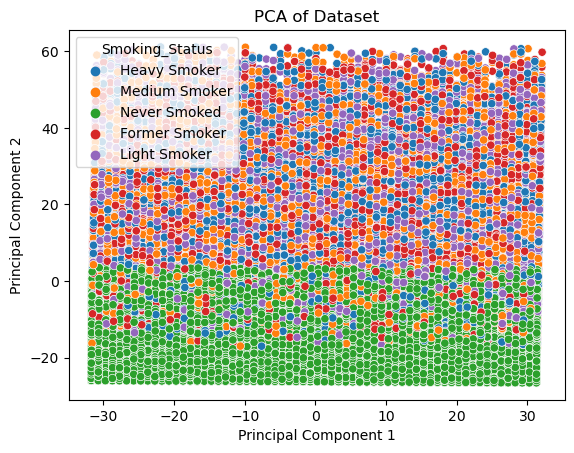

In [36]:
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Convert categorical variables to dummy variables
X = pd.get_dummies(df.drop('District', axis=1))

# Handling missing values
imputer = SimpleImputer(strategy='constant', fill_value=-1)
X_imputed = imputer.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_imputed)

# Plot the first two principal components
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Smoking_Status'])
plt.title('PCA of Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
